<a href="https://colab.research.google.com/github/Jishnuprakash/IntroToDeepLearning/blob/main/DL_02_Make_Moons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build a deep learning model for coordinate predictions using make moons dataset

In [1]:
#Import libraries/packages
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

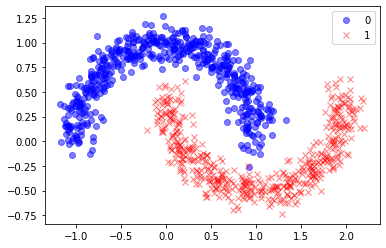

In [2]:
#Load and plot data
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [3]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=102)

In [4]:
#Load Kears Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

In [5]:
#Design your Model
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy'])

In [8]:
#Fit your data in to Model
model.fit(X_train, y_train, epochs=200, verbose=0)

In [9]:
#Evaluate your Model with Test data
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.0249 - accuracy: 0.9967


[0.02491152286529541, 0.996666669845581]

In [10]:
#Load and calculate accuracy, get confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
The Accuracy score on the Train set is:	1.000
The Accuracy score on the Test set is:	0.997


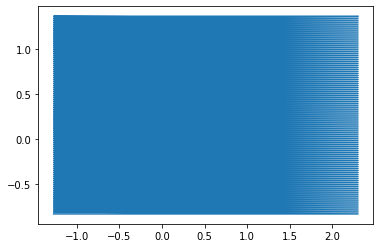

In [14]:
# Generate data for prediction
amin, bmin = X.min(axis=0) - 0.1
amax, bmax = X.max(axis=0) + 0.1
hticks = np.linspace(amin, amax, 101)
vticks = np.linspace(bmin, bmax, 101)

aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]
plt.plot(aa.ravel(), bb.ravel())

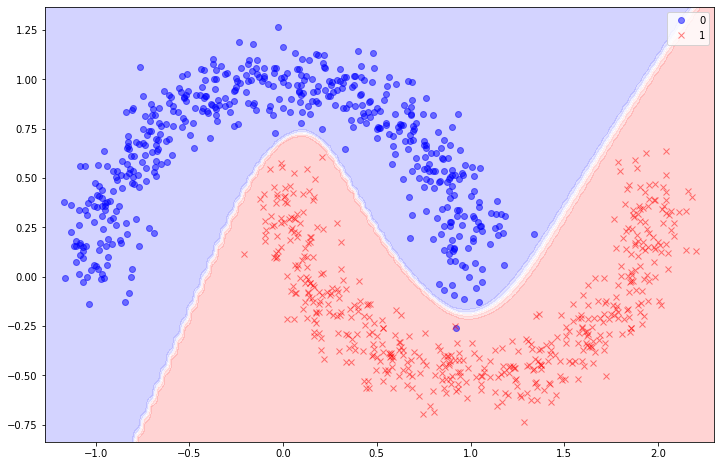

In [13]:
#Make predictions on generated data
c = model.predict(ab)
cc = c.reshape(aa.shape)

plt.figure(figsize=(12, 8))
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])